In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [2]:
from datetime import datetime as dt
from copy import deepcopy
import torch
print(torch.__version__)
print(torch.cuda.is_available())

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f

import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import transforms

from torch.utils.data import DataLoader

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from attacks import fgsm, pgd
from utils import clean_acc, adv_acc, print_table
from trainer import Trainer, plot_history
from model import Small
from layers import *

1.7.0
True


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

seed = torch.seed()
print(f"seed: {seed}")
torch.manual_seed(seed)

cuda
seed: 12568566683093290019


In [4]:
tr_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])
vl_transform = transforms.Compose([
    transforms.ToTensor()
])

ds_train = MNIST('../data', train=True, download=True, transform=tr_transform)
ds_test = MNIST('../data', train=False, download=True, transform=vl_transform)

batch_size = (100, 400)
train_dl = DataLoader(ds_train, batch_size=batch_size[0], shuffle=True)
test_dl = DataLoader(ds_test, batch_size=batch_size[1], shuffle=True)

iter_on_batch = len(train_dl)
print(f"iter_on_batch: {iter_on_batch}")

iter_on_batch: 600


## eps 0.005 co 50 epok
## kappa schodzi do 1/2 w 30 epok

In [5]:
from hyperparam_scheduler import LinearScheduler

kappa_scheduler = LinearScheduler(start=1, end=0.5)
kappa_scheduler.calc_coefficient(-0.5, 30, iter_on_batch)

eps_scheduler = LinearScheduler(start=0)
eps_scheduler.calc_coefficient(0.005, 50, iter_on_batch)

cuda
epoch start with: eps: 0.00000000, kappa: 1.00000000
function: _train_test_epoch took: 0:01:50
function: _train_test_epoch took: 0:00:04
Epoch: 1 Validation Loss: 0.1492 accuracy: 0.9539, robust err: 0.0941

epoch start with: eps: 0.00010000, kappa: 0.98333333
function: _train_test_epoch took: 0:02:20
function: _train_test_epoch took: 0:00:02
Epoch: 2 Validation Loss: 0.1043 accuracy: 0.9681, robust err: 0.1011

epoch start with: eps: 0.00020000, kappa: 0.96666667
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:02
Epoch: 3 Validation Loss: 0.0847 accuracy: 0.9759, robust err: 0.1045

epoch start with: eps: 0.00030000, kappa: 0.95000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:02
Epoch: 4 Validation Loss: 0.0740 accuracy: 0.9792, robust err: 0.0883

epoch start with: eps: 0.00040000, kappa: 0.93333333
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:02
Epoch: 5 Validation Loss: 

function: _train_test_epoch took: 0:01:01
function: _train_test_epoch took: 0:00:02
Epoch: 40 Validation Loss: 0.1744 accuracy: 0.9836, robust err: 0.0810

epoch start with: eps: 0.00400000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 41 Validation Loss: 0.1750 accuracy: 0.9837, robust err: 0.0820

epoch start with: eps: 0.00410000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:03
function: _train_test_epoch took: 0:00:02
Epoch: 42 Validation Loss: 0.1768 accuracy: 0.9834, robust err: 0.0819

epoch start with: eps: 0.00420000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 43 Validation Loss: 0.1776 accuracy: 0.9831, robust err: 0.0831

epoch start with: eps: 0.00430000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:02
function: _train_test_epoch took: 0:00:02
Epoch: 44 Validation Loss: 0.1794 accuracy: 0.9831, robust err: 0.0827

epoch st

function: _train_test_epoch took: 0:00:02
Epoch: 79 Validation Loss: 0.2278 accuracy: 0.9828, robust err: 0.0968

epoch start with: eps: 0.00790000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:02
function: _train_test_epoch took: 0:00:01
Epoch: 80 Validation Loss: 0.2280 accuracy: 0.9826, robust err: 0.0964

epoch start with: eps: 0.00800000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:03
function: _train_test_epoch took: 0:00:02
Epoch: 81 Validation Loss: 0.2297 accuracy: 0.9828, robust err: 0.0974

epoch start with: eps: 0.00810000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:01
function: _train_test_epoch took: 0:00:01
Epoch: 82 Validation Loss: 0.2321 accuracy: 0.9825, robust err: 0.0985

epoch start with: eps: 0.00820000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 83 Validation Loss: 0.2335 accuracy: 0.9823, robust err: 0.0986

epoch start with: eps: 0.00830000, kappa: 0.500000

function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 119 Validation Loss: 0.2831 accuracy: 0.9824, robust err: 0.1110

epoch start with: eps: 0.01190000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:02
Epoch: 120 Validation Loss: 0.2869 accuracy: 0.9820, robust err: 0.1106

epoch start with: eps: 0.01200000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 121 Validation Loss: 0.2858 accuracy: 0.9818, robust err: 0.1108

epoch start with: eps: 0.01210000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 122 Validation Loss: 0.2867 accuracy: 0.9828, robust err: 0.1125

epoch start with: eps: 0.01220000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 123 Validation Loss: 0.2903 accuracy: 0.9821, robust err: 0.1122

epo

function: _train_test_epoch took: 0:00:02
Epoch: 158 Validation Loss: 0.3500 accuracy: 0.9816, robust err: 0.1180

epoch start with: eps: 0.01580000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 159 Validation Loss: 0.3538 accuracy: 0.9815, robust err: 0.1200

epoch start with: eps: 0.01590000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 160 Validation Loss: 0.3571 accuracy: 0.9815, robust err: 0.1193

epoch start with: eps: 0.01600000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:01
Epoch: 161 Validation Loss: 0.3580 accuracy: 0.9814, robust err: 0.1172

epoch start with: eps: 0.01610000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:02
Epoch: 162 Validation Loss: 0.3572 accuracy: 0.9816, robust err: 0.1174

epoch start with: eps: 0.01620000, kappa: 0.5

function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 198 Validation Loss: 0.4304 accuracy: 0.9812, robust err: 0.1230

epoch start with: eps: 0.01980000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 199 Validation Loss: 0.4337 accuracy: 0.9812, robust err: 0.1218

epoch start with: eps: 0.01990000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 200 Validation Loss: 0.4394 accuracy: 0.9804, robust err: 0.1245

epoch start with: eps: 0.02000000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 201 Validation Loss: 0.4422 accuracy: 0.9810, robust err: 0.1224

epoch start with: eps: 0.02010000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 202 Validation Loss: 0.4430 accuracy: 0.9807, robust err: 0.1224

epo

function: _train_test_epoch took: 0:00:01
Epoch: 239 Validation Loss: 0.5315 accuracy: 0.9800, robust err: 0.1278

epoch start with: eps: 0.02390000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 240 Validation Loss: 0.5289 accuracy: 0.9802, robust err: 0.1301

epoch start with: eps: 0.02400000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 241 Validation Loss: 0.5292 accuracy: 0.9802, robust err: 0.1289

epoch start with: eps: 0.02410000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:01
Epoch: 242 Validation Loss: 0.5374 accuracy: 0.9801, robust err: 0.1294

epoch start with: eps: 0.02420000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:01
function: _train_test_epoch took: 0:00:02
Epoch: 243 Validation Loss: 0.5359 accuracy: 0.9807, robust err: 0.1296

epoch start with: eps: 0.02430000, kappa: 0.5

function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 279 Validation Loss: 0.6213 accuracy: 0.9792, robust err: 0.1360

epoch start with: eps: 0.02790000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 280 Validation Loss: 0.6177 accuracy: 0.9801, robust err: 0.1317

epoch start with: eps: 0.02800000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 281 Validation Loss: 0.6269 accuracy: 0.9790, robust err: 0.1350

epoch start with: eps: 0.02810000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 282 Validation Loss: 0.6254 accuracy: 0.9790, robust err: 0.1342

epoch start with: eps: 0.02820000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 283 Validation Loss: 0.6296 accuracy: 0.9793, robust err: 0.1383

epo

function: _train_test_epoch took: 0:00:02
Epoch: 318 Validation Loss: 0.7069 accuracy: 0.9789, robust err: 0.1396

epoch start with: eps: 0.03180000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:01
function: _train_test_epoch took: 0:00:02
Epoch: 319 Validation Loss: 0.7068 accuracy: 0.9795, robust err: 0.1416

epoch start with: eps: 0.03190000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 320 Validation Loss: 0.7123 accuracy: 0.9791, robust err: 0.1422

epoch start with: eps: 0.03200000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 321 Validation Loss: 0.7100 accuracy: 0.9784, robust err: 0.1405

epoch start with: eps: 0.03210000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:01
Epoch: 322 Validation Loss: 0.7150 accuracy: 0.9788, robust err: 0.1460

epoch start with: eps: 0.03220000, kappa: 0.5

function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 358 Validation Loss: 0.7782 accuracy: 0.9786, robust err: 0.1494

epoch start with: eps: 0.03580000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 359 Validation Loss: 0.7788 accuracy: 0.9778, robust err: 0.1478

epoch start with: eps: 0.03590000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 360 Validation Loss: 0.7758 accuracy: 0.9784, robust err: 0.1471

epoch start with: eps: 0.03600000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 361 Validation Loss: 0.7757 accuracy: 0.9780, robust err: 0.1467

epoch start with: eps: 0.03610000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 362 Validation Loss: 0.7758 accuracy: 0.9768, robust err: 0.1484

epo

function: _train_test_epoch took: 0:00:02
Epoch: 397 Validation Loss: 0.8456 accuracy: 0.9775, robust err: 0.1551

epoch start with: eps: 0.03970000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:56
function: _train_test_epoch took: 0:00:01
Epoch: 398 Validation Loss: 0.8578 accuracy: 0.9766, robust err: 0.1629

epoch start with: eps: 0.03980000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 399 Validation Loss: 0.8428 accuracy: 0.9774, robust err: 0.1495

epoch start with: eps: 0.03990000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 400 Validation Loss: 0.8498 accuracy: 0.9785, robust err: 0.1503

epoch start with: eps: 0.04000000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:56
function: _train_test_epoch took: 0:00:01
Epoch: 401 Validation Loss: 0.8512 accuracy: 0.9779, robust err: 0.1508

epoch start with: eps: 0.04010000, kappa: 0.5

function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 437 Validation Loss: 0.8963 accuracy: 0.9773, robust err: 0.1486

epoch start with: eps: 0.04370000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:52
function: _train_test_epoch took: 0:00:01
Epoch: 438 Validation Loss: 0.9027 accuracy: 0.9772, robust err: 0.1576

epoch start with: eps: 0.04380000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:01
Epoch: 439 Validation Loss: 0.9047 accuracy: 0.9764, robust err: 0.1569

epoch start with: eps: 0.04390000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:02
Epoch: 440 Validation Loss: 0.9017 accuracy: 0.9770, robust err: 0.1587

epoch start with: eps: 0.04400000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 441 Validation Loss: 0.9015 accuracy: 0.9773, robust err: 0.1555

epo

function: _train_test_epoch took: 0:00:01
Epoch: 476 Validation Loss: 0.9348 accuracy: 0.9757, robust err: 0.1548

epoch start with: eps: 0.04760000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 477 Validation Loss: 0.9351 accuracy: 0.9765, robust err: 0.1604

epoch start with: eps: 0.04770000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 478 Validation Loss: 0.9449 accuracy: 0.9766, robust err: 0.1644

epoch start with: eps: 0.04780000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:50
function: _train_test_epoch took: 0:00:01
Epoch: 479 Validation Loss: 0.9384 accuracy: 0.9761, robust err: 0.1628

epoch start with: eps: 0.04790000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:50
function: _train_test_epoch took: 0:00:02
Epoch: 480 Validation Loss: 0.9366 accuracy: 0.9759, robust err: 0.1585

epoch start with: eps: 0.04800000, kappa: 0.5

function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:01
Epoch: 516 Validation Loss: 0.9513 accuracy: 0.9756, robust err: 0.1625

epoch start with: eps: 0.05160000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:50
function: _train_test_epoch took: 0:00:01
Epoch: 517 Validation Loss: 0.9455 accuracy: 0.9745, robust err: 0.1565

epoch start with: eps: 0.05170000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 518 Validation Loss: 0.9508 accuracy: 0.9763, robust err: 0.1605

epoch start with: eps: 0.05180000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 519 Validation Loss: 0.9475 accuracy: 0.9751, robust err: 0.1551

epoch start with: eps: 0.05190000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 520 Validation Loss: 0.9507 accuracy: 0.9748, robust err: 0.1570

epo

function: _train_test_epoch took: 0:00:02
Epoch: 555 Validation Loss: 0.9350 accuracy: 0.9754, robust err: 0.1562

epoch start with: eps: 0.05550000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 556 Validation Loss: 0.9392 accuracy: 0.9759, robust err: 0.1622

epoch start with: eps: 0.05560000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:01
Epoch: 557 Validation Loss: 0.9338 accuracy: 0.9756, robust err: 0.1594

epoch start with: eps: 0.05570000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:50
function: _train_test_epoch took: 0:00:02
Epoch: 558 Validation Loss: 0.9255 accuracy: 0.9754, robust err: 0.1610

epoch start with: eps: 0.05580000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:01
Epoch: 559 Validation Loss: 0.9389 accuracy: 0.9728, robust err: 0.1651

epoch start with: eps: 0.05590000, kappa: 0.5

function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 595 Validation Loss: 0.8824 accuracy: 0.9723, robust err: 0.1732

epoch start with: eps: 0.05950000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 596 Validation Loss: 0.8651 accuracy: 0.9740, robust err: 0.1588

epoch start with: eps: 0.05960000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 597 Validation Loss: 0.8644 accuracy: 0.9751, robust err: 0.1585

epoch start with: eps: 0.05970000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 598 Validation Loss: 0.8799 accuracy: 0.9728, robust err: 0.1748

epoch start with: eps: 0.05980000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 599 Validation Loss: 0.8658 accuracy: 0.9744, robust err: 0.1641

epo

function: _train_test_epoch took: 0:00:02
Epoch: 634 Validation Loss: 0.8297 accuracy: 0.9740, robust err: 0.1675

epoch start with: eps: 0.06340000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:50
function: _train_test_epoch took: 0:00:02
Epoch: 635 Validation Loss: 0.8315 accuracy: 0.9747, robust err: 0.1705

epoch start with: eps: 0.06350000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 636 Validation Loss: 0.8260 accuracy: 0.9736, robust err: 0.1600

epoch start with: eps: 0.06360000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 637 Validation Loss: 0.8183 accuracy: 0.9738, robust err: 0.1633

epoch start with: eps: 0.06370000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 638 Validation Loss: 0.8151 accuracy: 0.9735, robust err: 0.1692

epoch start with: eps: 0.06380000, kappa: 0.5

function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 674 Validation Loss: 0.8055 accuracy: 0.9721, robust err: 0.1810

epoch start with: eps: 0.06740000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 675 Validation Loss: 0.7793 accuracy: 0.9737, robust err: 0.1631

epoch start with: eps: 0.06750000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:50
function: _train_test_epoch took: 0:00:02
Epoch: 676 Validation Loss: 0.7923 accuracy: 0.9741, robust err: 0.1787

epoch start with: eps: 0.06760000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 677 Validation Loss: 0.7844 accuracy: 0.9732, robust err: 0.1627

epoch start with: eps: 0.06770000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:01
Epoch: 678 Validation Loss: 0.7895 accuracy: 0.9736, robust err: 0.1644

epo

function: _train_test_epoch took: 0:00:02
Epoch: 713 Validation Loss: 0.7728 accuracy: 0.9739, robust err: 0.1652

epoch start with: eps: 0.07130000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:01
Epoch: 714 Validation Loss: 0.7632 accuracy: 0.9731, robust err: 0.1700

epoch start with: eps: 0.07140000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:50
function: _train_test_epoch took: 0:00:01
Epoch: 715 Validation Loss: 0.7793 accuracy: 0.9718, robust err: 0.1748

epoch start with: eps: 0.07150000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:52
function: _train_test_epoch took: 0:00:02
Epoch: 716 Validation Loss: 0.7657 accuracy: 0.9732, robust err: 0.1604

epoch start with: eps: 0.07160000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 717 Validation Loss: 0.7732 accuracy: 0.9744, robust err: 0.1778

epoch start with: eps: 0.07170000, kappa: 0.5

function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 753 Validation Loss: 0.7405 accuracy: 0.9725, robust err: 0.1755

epoch start with: eps: 0.07530000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 754 Validation Loss: 0.7385 accuracy: 0.9716, robust err: 0.1722

epoch start with: eps: 0.07540000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 755 Validation Loss: 0.7578 accuracy: 0.9707, robust err: 0.1787

epoch start with: eps: 0.07550000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 756 Validation Loss: 0.7379 accuracy: 0.9723, robust err: 0.1756

epoch start with: eps: 0.07560000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 757 Validation Loss: 0.7371 accuracy: 0.9723, robust err: 0.1651

epo

function: _train_test_epoch took: 0:00:02
Epoch: 792 Validation Loss: 0.7090 accuracy: 0.9710, robust err: 0.1686

epoch start with: eps: 0.07920000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:02
Epoch: 793 Validation Loss: 0.7101 accuracy: 0.9712, robust err: 0.1661

epoch start with: eps: 0.07930000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 794 Validation Loss: 0.7237 accuracy: 0.9710, robust err: 0.1728

epoch start with: eps: 0.07940000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 795 Validation Loss: 0.7212 accuracy: 0.9717, robust err: 0.1746

epoch start with: eps: 0.07950000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 796 Validation Loss: 0.7307 accuracy: 0.9716, robust err: 0.1704

epoch start with: eps: 0.07960000, kappa: 0.5

function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 832 Validation Loss: 0.7300 accuracy: 0.9691, robust err: 0.1722

epoch start with: eps: 0.08320000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:01
function: _train_test_epoch took: 0:00:01
Epoch: 833 Validation Loss: 0.7394 accuracy: 0.9711, robust err: 0.1911

epoch start with: eps: 0.08330000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 834 Validation Loss: 0.7162 accuracy: 0.9714, robust err: 0.1678

epoch start with: eps: 0.08340000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 835 Validation Loss: 0.7322 accuracy: 0.9714, robust err: 0.1762

epoch start with: eps: 0.08350000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 836 Validation Loss: 0.7560 accuracy: 0.9682, robust err: 0.1967

epo

function: _train_test_epoch took: 0:00:02
Epoch: 871 Validation Loss: 0.7176 accuracy: 0.9714, robust err: 0.1732

epoch start with: eps: 0.08710000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 872 Validation Loss: 0.7316 accuracy: 0.9702, robust err: 0.1847

epoch start with: eps: 0.08720000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 873 Validation Loss: 0.7105 accuracy: 0.9706, robust err: 0.1690

epoch start with: eps: 0.08730000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:01
function: _train_test_epoch took: 0:00:02
Epoch: 874 Validation Loss: 0.7102 accuracy: 0.9703, robust err: 0.1695

epoch start with: eps: 0.08740000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 875 Validation Loss: 0.7039 accuracy: 0.9698, robust err: 0.1718

epoch start with: eps: 0.08750000, kappa: 0.5

function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 911 Validation Loss: 0.7096 accuracy: 0.9689, robust err: 0.1805

epoch start with: eps: 0.09110000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 912 Validation Loss: 0.7082 accuracy: 0.9703, robust err: 0.1710

epoch start with: eps: 0.09120000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 913 Validation Loss: 0.7368 accuracy: 0.9657, robust err: 0.1928

epoch start with: eps: 0.09130000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 914 Validation Loss: 0.7105 accuracy: 0.9697, robust err: 0.1718

epoch start with: eps: 0.09140000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 915 Validation Loss: 0.7219 accuracy: 0.9701, robust err: 0.1818

epo

function: _train_test_epoch took: 0:00:02
Epoch: 950 Validation Loss: 0.7403 accuracy: 0.9698, robust err: 0.1659

epoch start with: eps: 0.09500000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:01
Epoch: 951 Validation Loss: 0.7293 accuracy: 0.9710, robust err: 0.1772

epoch start with: eps: 0.09510000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 952 Validation Loss: 0.7310 accuracy: 0.9705, robust err: 0.1709

epoch start with: eps: 0.09520000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 953 Validation Loss: 0.7486 accuracy: 0.9705, robust err: 0.1901

epoch start with: eps: 0.09530000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 954 Validation Loss: 0.7636 accuracy: 0.9677, robust err: 0.1858

epoch start with: eps: 0.09540000, kappa: 0.5

function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 990 Validation Loss: 0.7765 accuracy: 0.9670, robust err: 0.1860

epoch start with: eps: 0.09900000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 991 Validation Loss: 0.7624 accuracy: 0.9687, robust err: 0.1759

epoch start with: eps: 0.09910000, kappa: 0.50000000
function: _train_test_epoch took: 0:02:30
function: _train_test_epoch took: 0:00:04
Epoch: 992 Validation Loss: 0.7642 accuracy: 0.9715, robust err: 0.1715

epoch start with: eps: 0.09920000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:05
function: _train_test_epoch took: 0:00:02
Epoch: 993 Validation Loss: 0.7839 accuracy: 0.9674, robust err: 0.1933

epoch start with: eps: 0.09930000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:12
function: _train_test_epoch took: 0:00:04
Epoch: 994 Validation Loss: 0.7705 accuracy: 0.9690, robust err: 0.1768

epo

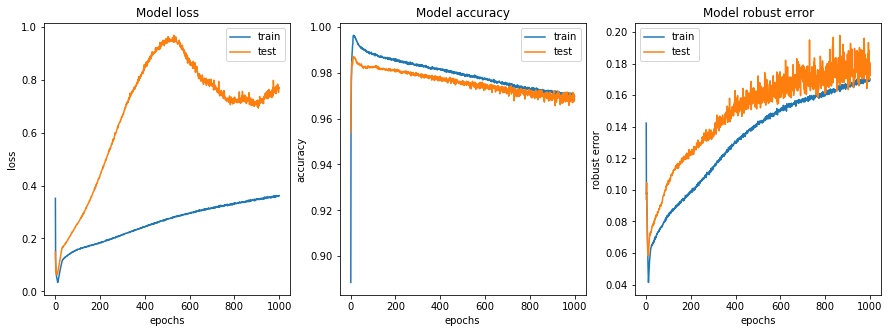

In [6]:
model_name = "mnist_small_0_005_exp3"


trainer = Trainer(model_name, train_dl, test_dl, eps_scheduler, kappa_scheduler, checkpoint=10)
model = Small()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', min_lr=1e-4,
                                                 patience=2, verbose=True)

history = trainer.train(model, loss_fn, optimizer, scheduler, epochs=1000)
plot_history(model_name, history)

In [7]:
print(f"max eps: {eps_scheduler.current}")

max eps: 0.09999999999939992


In [8]:
test_transform = transforms.Compose([
    transforms.ToTensor(),
])

ds = MNIST('../data', train=False, target_transform=None, download=True, transform=test_transform)
test_loader = DataLoader(ds, 400, shuffle=True)


def create_attack(eps, alpha, num_iter):
    d = {
        "epsilon": eps,
        "alpha": alpha,
        "num_iter": num_iter
    }
    return f"e={eps:.1f},a={alpha:.1f},i={num_iter}", d
    

attack1 = create_attack(eps=0.1, alpha=0.1, num_iter=30)
attack2 = create_attack(eps=0.2, alpha=0.1, num_iter=30)
attack3 = create_attack(eps=0.3, alpha=0.1, num_iter=30)
attack4 = create_attack(eps=0.4, alpha=0.1, num_iter=30)

params = [attack1, attack2, attack3, attack4]

In [9]:
model_name = "mnist_small_0_005_exp3"

In [10]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_10.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9843                            
name: e=0.1,a=0.1,i=30 accuracy: 0.6747           
name: e=0.2,a=0.1,i=30 accuracy: 0.0082           
name: e=0.3,a=0.1,i=30 accuracy: 0.0000           
name: e=0.4,a=0.1,i=30 accuracy: 0.0000           


In [11]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_100.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9827                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7420           
name: e=0.2,a=0.1,i=30 accuracy: 0.0242           
name: e=0.3,a=0.1,i=30 accuracy: 0.0031           
name: e=0.4,a=0.1,i=30 accuracy: 0.0017           


In [12]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_200.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9804                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7553           
name: e=0.2,a=0.1,i=30 accuracy: 0.1058           
name: e=0.3,a=0.1,i=30 accuracy: 0.0746           
name: e=0.4,a=0.1,i=30 accuracy: 0.0699           


In [13]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_300.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9789                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7518           
name: e=0.2,a=0.1,i=30 accuracy: 0.1140           
name: e=0.3,a=0.1,i=30 accuracy: 0.0796           
name: e=0.4,a=0.1,i=30 accuracy: 0.0775           


In [14]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_400.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9785                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7546           
name: e=0.2,a=0.1,i=30 accuracy: 0.1108           
name: e=0.3,a=0.1,i=30 accuracy: 0.0682           
name: e=0.4,a=0.1,i=30 accuracy: 0.0669           


In [15]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_500.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9766                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7595           
name: e=0.2,a=0.1,i=30 accuracy: 0.1193           
name: e=0.3,a=0.1,i=30 accuracy: 0.0726           
name: e=0.4,a=0.1,i=30 accuracy: 0.0715           


In [16]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_600.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9728                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7493           
name: e=0.2,a=0.1,i=30 accuracy: 0.1172           
name: e=0.3,a=0.1,i=30 accuracy: 0.0813           
name: e=0.4,a=0.1,i=30 accuracy: 0.0781           


In [17]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_700.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9729                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7361           
name: e=0.2,a=0.1,i=30 accuracy: 0.1007           
name: e=0.3,a=0.1,i=30 accuracy: 0.0690           
name: e=0.4,a=0.1,i=30 accuracy: 0.0675           


In [18]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_800.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9703                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7241           
name: e=0.2,a=0.1,i=30 accuracy: 0.0867           
name: e=0.3,a=0.1,i=30 accuracy: 0.0539           
name: e=0.4,a=0.1,i=30 accuracy: 0.0494           


In [19]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_900.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9685                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7218           
name: e=0.2,a=0.1,i=30 accuracy: 0.1090           
name: e=0.3,a=0.1,i=30 accuracy: 0.0829           
name: e=0.4,a=0.1,i=30 accuracy: 0.0791           


In [20]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_1000.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9682                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7240           
name: e=0.2,a=0.1,i=30 accuracy: 0.1074           
name: e=0.3,a=0.1,i=30 accuracy: 0.0806           
name: e=0.4,a=0.1,i=30 accuracy: 0.0782           
